# Routh Array

In [1]:
try:
    from tbcontrol.symbolic import routh
except:
    !pip install tbcontrol
    from tbcontrol.symbolic import routh

import numpy as np
import sympy 
from sympy import fraction, roots, re, N 
sympy.init_printing()
print('sympy version '+sympy.__version__)

s = sympy.Symbol('s')
a_0, a_1, a_2, a_3, a_4 = sympy.symbols('a_0:5')
K_c = sympy.Symbol('K_c')

sympy version 1.9


In [2]:
help(routh)

Help on function routh in module tbcontrol.symbolic:

routh(p)
    Construct the Routh-Hurwitz array given a polynomial in s
    
    Input: p - a sympy.Poly object
    Output: The Routh-Hurwitz array as a sympy.Matrix object



## Basics

In [3]:
p = a_0 + a_1*s**1 + a_2*s**2 + a_3*s**3 + a_4*s**4
p = sympy.Poly(p, s)
p

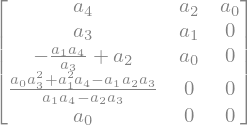

In [4]:
routh(p)

In [5]:
p = s**6 + 7*s**5 + 13*s**4 + 8*s**3 + 5*s**2 + 10*s + 16
p = sympy.Poly(p, s)
p

In [6]:
rr = p.nroots()
for root in rr:
    r, i = root.as_real_imag()
    if abs(i) > 1e-5:
        print('%8.3f %8.3fi' % (r,i))
    else:
        print('%8.3f' % (r))

  -4.434
  -2.000
  -0.907   -0.933i
  -0.907    0.933i
   0.625   -0.822i
   0.625    0.822i


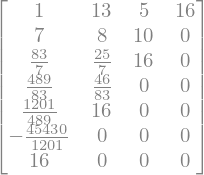

In [7]:
routh(p)

## Example 1

In [8]:
p = s**3 + s**2 + s + 2
p = sympy.Poly(p, s)
p

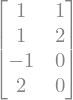

In [9]:
routh(p)

In [10]:
rr = p.nroots()
for root in rr:
    r, i = root.as_real_imag()
    if abs(i) > 1e-5:
        print('%8.3f %8.3fi' % (r,i))
    else:
        print('%8.3f' % (r))

  -1.353
   0.177   -1.203i
   0.177    1.203i


## Example 2

In [11]:
p = s**3 + 4*s**2 + 8*s + 4
p = sympy.Poly(p, s)
p

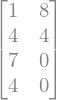

In [12]:
RA = routh(p)
RA

In [13]:
msgs = 'Stable' if min(RA[:, 0]) > 0 else 'Unstable'
print(msgs)

Stable


In [14]:
rr = p.nroots()
for root in rr:
    r, i = root.as_real_imag()
    if abs(i) > 1e-5:
        print('%8.3f %8.3fi' % (r,i))
    else:
        print('%8.3f' % (r))

  -0.704
  -1.648   -1.721i
  -1.648    1.721i


## Check if poles satisfy $Re[s] \leq h$

In [15]:
h = -0.71
pa = p.subs(s,s+h)
pa = sympy.Poly(pa, s)
pa

In [16]:
RAa = routh(pa)

In [17]:
msgs = 'are' if min(RAa[:, 0]) > 0 else 'are not'
print('Poles '+msgs+' left of s = '+str(h))

Poles are not left of s = -0.71


## Example 3

In [18]:
G = 1/((1+0.1*s)*(1+0.2*s)*(1+0.3*s))
Gcl = G/(1 + K_c * G)
n,d = fraction(Gcl.simplify())
p = d.expand()
p

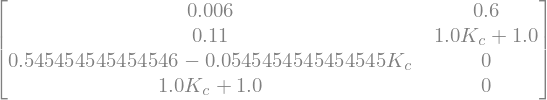

In [19]:
RA = routh(sympy.Poly(p, s))
RA

In [20]:
rr = sympy.solve([e > 0 for e in RA[:, 0]], K_c)
rr

In [21]:
step = (float(rr.as_set().end+1) - float(rr.as_set().start-1) )/10 
for k_c in np.arange(float(rr.as_set().start-1),float(rr.as_set().end+1),int(step)):
    r = roots(d.subs(K_c,k_c))
    N = len(r)
    real_part = [re(e) for e in list(r)[0:N]]
    msgs = 'Unstable' if max(real_part) >= 0 else 'Stable'        
    print(f'For K_c = {k_c:4.1f} system is '+msgs)

For K_c = -2.0 system is Unstable
For K_c = -1.0 system is Unstable
For K_c =  0.0 system is Stable
For K_c =  1.0 system is Stable
For K_c =  2.0 system is Stable
For K_c =  3.0 system is Stable
For K_c =  4.0 system is Stable
For K_c =  5.0 system is Stable
For K_c =  6.0 system is Stable
For K_c =  7.0 system is Stable
For K_c =  8.0 system is Stable
For K_c =  9.0 system is Stable
For K_c = 10.0 system is Unstable


## Example 10

In [22]:
p = s**2 + K_c*s + (2*K_c-1) 
p = sympy.Poly(p, s)
p

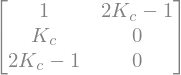

In [23]:
RA = routh(sympy.Poly(p, s))
RA

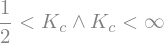

In [24]:
sympy.solve([e > 0 for e in RA[:, 0]], K_c)

In [25]:
for k_c in np.arange(-1,5,1):
    r = roots(p.subs(K_c,k_c))
    N = len(r)
    real_part = [re(e) for e in list(r)[0:N]]
    msgs = 'Stable'
    if max(real_part) >= 0:
        msgs = 'Unstable'        
    print(f'For K_c = {k_c:4.1f} system is '+msgs)

For K_c = -1.0 system is Unstable
For K_c =  0.0 system is Unstable
For K_c =  1.0 system is Stable
For K_c =  2.0 system is Stable
For K_c =  3.0 system is Stable
For K_c =  4.0 system is Stable


## Example 11

In [26]:
p = s**3 + 14*s**2 + 56*s + K_c 
p = sympy.Poly(p, s)
p

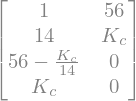

In [27]:
RA = routh(sympy.Poly(p, s))
RA

In [28]:
rr = sympy.solve([e > 0 for e in RA[:, 0]], K_c)
rr

In [29]:
for k_c in np.arange(-2,rr.args[1].args[1]*1.1,100):
    r = roots(p.subs(K_c,k_c))
    N = len(r)
    real_part = [re(e) for e in list(r)[0:N]]
    msgs = 'Stable'
    if max(real_part) >= 0:
        msgs = 'Unstable'        
    print(f'For K_c = {k_c:5.1f} system is '+msgs)

For K_c =  -2.0 system is Unstable
For K_c =  98.0 system is Stable
For K_c = 198.0 system is Stable
For K_c = 298.0 system is Stable
For K_c = 398.0 system is Stable
For K_c = 498.0 system is Stable
For K_c = 598.0 system is Stable
For K_c = 698.0 system is Stable
For K_c = 798.0 system is Unstable


In [30]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig
%matplotlib inline

def nicegrid():
    plt.grid(True, which='major', color='#666666', linestyle='-')
    plt.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.minorticks_on()

In [31]:
RR = np.concatenate([np.linspace(-20,1,200),np.linspace(1,900,100)])
R = np.zeros((len(RR),3),dtype=complex)
ii = 0
for k_c in RR:
    r = roots(p.subs(K_c,k_c))
    R[ii,:] = [e for e in list(r)[0:len(r)]]
    ii += 1

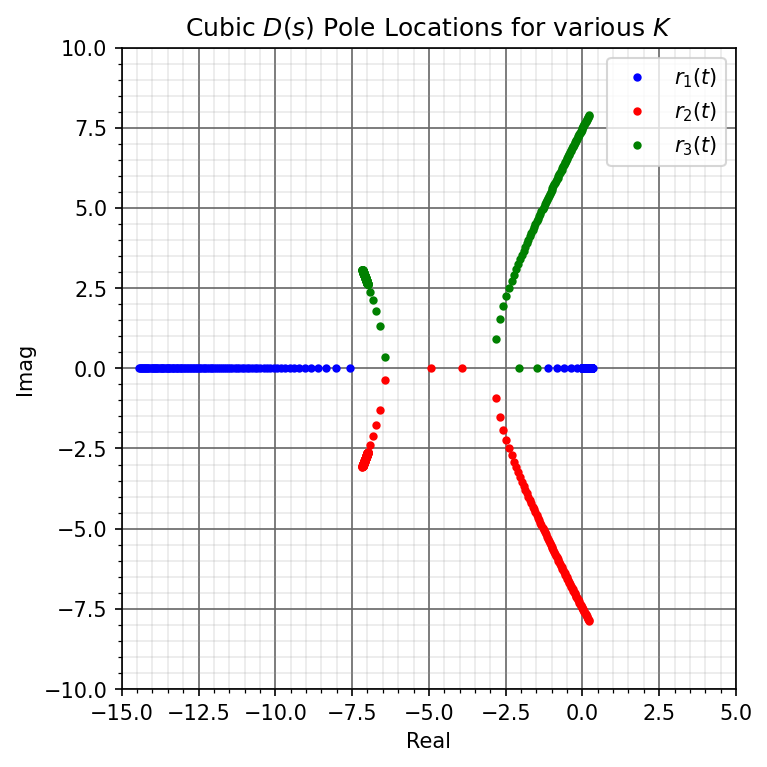

In [32]:
fig = plt.figure(figsize=(5, 5),dpi=150,constrained_layout = True)
plt.plot(np.real(R[:,0]),np.imag(R[:,0]),'b.',linewidth=4,label='$r_1(t)$')
plt.plot(np.real(R[:,1]),np.imag(R[:,1]),'r.',linewidth=4,label='$r_2(t)$')
plt.plot(np.real(R[:,2]),np.imag(R[:,2]),'g.',linewidth=4,label='$r_3(t)$')

nicegrid()
plt.legend()
plt.xlim(-15,5)
plt.ylim(-10,10)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Cubic $D(s)$ Pole Locations for various $K$')
plt.show()

In [37]:
rr

In [38]:
f = sympy.lambdify(K_c, RA)
f(1)

array([[ 1.        , 56.        ],
       [14.        ,  1.        ],
       [55.92857143,  0.        ],
       [ 1.        ,  0.        ]])

In [39]:
f(-2)

array([[ 1.        , 56.        ],
       [14.        , -2.        ],
       [56.14285714,  0.        ],
       [-2.        ,  0.        ]])